In [50]:
#Others
import random
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import math
import os
import warnings
import optuna
import joblib
import matplotlib.pyplot as plt

In [51]:
#Importing packages
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn import preprocessing

In [52]:
#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [53]:
os.chdir("C:/Users/A/Desktop/Bioactive/EBV")

In [66]:
#Reading the data
ML_data= pd.read_csv("./ML_data.csv",header=0,index_col=0)
X_NAomit_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./data_psm.csv',index_col=0)

#original data(descriptors= 4175）
print(X_NAomit_data.shape)
X_NAomit_data.head()

(1146, 3918)


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
3185712.0,536.72,7.667429,44.0231,70.4832,46.3981,79.1450,0.628901,1.006903,0.662830,1.130643,...,0.0,3.0,0.0,14.0,31.5,0.828947,9.5,0.250000,40.917043,12.132410
3532333.0,359.86,9.470000,26.6692,38.6617,28.0001,42.2689,0.701821,1.017413,0.736845,1.112339,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
16830460.0,472.41,8.589273,36.4596,55.6470,38.2673,61.9503,0.662902,1.011764,0.695769,1.126369,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3921421.0,468.59,7.437937,40.7504,62.9996,42.7276,70.2318,0.646832,0.999994,0.678216,1.114790,...,0.0,0.0,6.0,18.0,31.0,0.885714,4.0,0.114286,33.763886,4.472136
1314610.0,353.78,9.561622,26.6701,38.0290,27.0455,41.1431,0.720814,1.027811,0.730959,1.111976,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [67]:
X_NAomit_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)
X_NAomit_data

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
3185712.0,536.72,7.667429,44.0231,70.4832,46.3981,79.1450,0.628901,1.006903,0.662830,1.130643,...,0.0,3.0,0.0,14.0,31.5,0.828947,9.5,0.250000,40.917043,12.132410
3532333.0,359.86,9.470000,26.6692,38.6617,28.0001,42.2689,0.701821,1.017413,0.736845,1.112339,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
16830460.0,472.41,8.589273,36.4596,55.6470,38.2673,61.9503,0.662902,1.011764,0.695769,1.126369,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3921421.0,468.59,7.437937,40.7504,62.9996,42.7276,70.2318,0.646832,0.999994,0.678216,1.114790,...,0.0,0.0,6.0,18.0,31.0,0.885714,4.0,0.114286,33.763886,4.472136
1314610.0,353.78,9.561622,26.6701,38.0290,27.0455,41.1431,0.720814,1.027811,0.730959,1.111976,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664630.0,272.38,6.809500,24.2136,39.8106,25.7730,45.1522,0.605340,0.995265,0.644325,1.128805,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3228536.0,395.47,8.788222,30.7981,45.8762,31.8126,50.1589,0.684402,1.019471,0.706947,1.114642,...,0.0,6.0,5.0,9.0,21.0,0.750000,6.0,0.214286,17.748239,5.196152
666815.0,397.48,7.643846,32.7074,52.7706,33.6991,59.0659,0.628988,1.014819,0.648060,1.135883,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [68]:
col_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)

In [69]:
X_NAomit_data

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
3185712.0,536.72,7.667429,44.0231,70.4832,46.3981,79.1450,0.628901,1.006903,0.662830,1.130643,...,0.0,3.0,0.0,14.0,31.5,0.828947,9.5,0.250000,40.917043,12.132410
3532333.0,359.86,9.470000,26.6692,38.6617,28.0001,42.2689,0.701821,1.017413,0.736845,1.112339,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
16830460.0,472.41,8.589273,36.4596,55.6470,38.2673,61.9503,0.662902,1.011764,0.695769,1.126369,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3921421.0,468.59,7.437937,40.7504,62.9996,42.7276,70.2318,0.646832,0.999994,0.678216,1.114790,...,0.0,0.0,6.0,18.0,31.0,0.885714,4.0,0.114286,33.763886,4.472136
1314610.0,353.78,9.561622,26.6701,38.0290,27.0455,41.1431,0.720814,1.027811,0.730959,1.111976,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664630.0,272.38,6.809500,24.2136,39.8106,25.7730,45.1522,0.605340,0.995265,0.644325,1.128805,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3228536.0,395.47,8.788222,30.7981,45.8762,31.8126,50.1589,0.684402,1.019471,0.706947,1.114642,...,0.0,6.0,5.0,9.0,21.0,0.750000,6.0,0.214286,17.748239,5.196152
666815.0,397.48,7.643846,32.7074,52.7706,33.6991,59.0659,0.628988,1.014819,0.648060,1.135883,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [70]:
threshold = 0.99  # 如果列中 0 的比例超过 90%，则移除该列
non_zero_threshold = X_NAomit_data.shape[0] * (1 - threshold)
X_NAomit_data =X_NAomit_data.loc[:, (X_NAomit_data != 0).sum(axis=0) > non_zero_threshold]

In [71]:
X_NAomit_data 

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s4_numRotBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
3185712.0,536.72,7.667429,44.0231,70.4832,46.3981,79.1450,0.628901,1.006903,0.662830,1.130643,...,5.5,3.0,0.0,14.0,31.5,0.828947,9.5,0.250000,40.917043,12.132410
3532333.0,359.86,9.470000,26.6692,38.6617,28.0001,42.2689,0.701821,1.017413,0.736845,1.112339,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
16830460.0,472.41,8.589273,36.4596,55.6470,38.2673,61.9503,0.662902,1.011764,0.695769,1.126369,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3921421.0,468.59,7.437937,40.7504,62.9996,42.7276,70.2318,0.646832,0.999994,0.678216,1.114790,...,6.0,0.0,6.0,18.0,31.0,0.885714,4.0,0.114286,33.763886,4.472136
1314610.0,353.78,9.561622,26.6701,38.0290,27.0455,41.1431,0.720814,1.027811,0.730959,1.111976,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664630.0,272.38,6.809500,24.2136,39.8106,25.7730,45.1522,0.605340,0.995265,0.644325,1.128805,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3228536.0,395.47,8.788222,30.7981,45.8762,31.8126,50.1589,0.684402,1.019471,0.706947,1.114642,...,2.0,6.0,5.0,9.0,21.0,0.750000,6.0,0.214286,17.748239,5.196152
666815.0,397.48,7.643846,32.7074,52.7706,33.6991,59.0659,0.628988,1.014819,0.648060,1.135883,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [72]:
X=np.array(X_NAomit_data)
X

array([[5.36720000e+02, 7.66742857e+00, 4.40231000e+01, ...,
        2.50000000e-01, 4.09170434e+01, 1.21324101e+01],
       [3.59860000e+02, 9.47000000e+00, 2.66692000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.72410000e+02, 8.58927273e+00, 3.64596000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.97480000e+02, 7.64384615e+00, 3.27074000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.71610000e+02, 7.99338983e+00, 3.93893000e+01, ...,
        1.17647059e-01, 1.94662278e+01, 5.09807621e+00],
       [2.89320000e+02, 8.76727273e+00, 2.34022000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [73]:
X_NAomit_data 

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s4_numRotBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
3185712.0,536.72,7.667429,44.0231,70.4832,46.3981,79.1450,0.628901,1.006903,0.662830,1.130643,...,5.5,3.0,0.0,14.0,31.5,0.828947,9.5,0.250000,40.917043,12.132410
3532333.0,359.86,9.470000,26.6692,38.6617,28.0001,42.2689,0.701821,1.017413,0.736845,1.112339,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
16830460.0,472.41,8.589273,36.4596,55.6470,38.2673,61.9503,0.662902,1.011764,0.695769,1.126369,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3921421.0,468.59,7.437937,40.7504,62.9996,42.7276,70.2318,0.646832,0.999994,0.678216,1.114790,...,6.0,0.0,6.0,18.0,31.0,0.885714,4.0,0.114286,33.763886,4.472136
1314610.0,353.78,9.561622,26.6701,38.0290,27.0455,41.1431,0.720814,1.027811,0.730959,1.111976,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664630.0,272.38,6.809500,24.2136,39.8106,25.7730,45.1522,0.605340,0.995265,0.644325,1.128805,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3228536.0,395.47,8.788222,30.7981,45.8762,31.8126,50.1589,0.684402,1.019471,0.706947,1.114642,...,2.0,6.0,5.0,9.0,21.0,0.750000,6.0,0.214286,17.748239,5.196152
666815.0,397.48,7.643846,32.7074,52.7706,33.6991,59.0659,0.628988,1.014819,0.648060,1.135883,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [74]:
Raw_data

,IsomericSMILES,Activity,Canonical_smiles
OPTUM_LAB_ID,,,
3185712.0,CC1=CC=CC=C1N(C(C2=CC=C(C=C2)N(C)C)C(=O)NCC3CC...,1,Cc1ccccc1N(C(=O)c1snc(C(N)=O)c1N)C(C(=O)NCC1CC...
3532333.0,C1=CC=C2C(=C1)C(=O)N(C(=S)N2)CCC(=O)NC3=CC(=CC...,1,O=C(CCn1c(=S)[nH]c2ccccc2c1=O)Nc1cccc(Cl)c1
16830460.0,CN1CCN(CC1)C2=NN=C(C=C2)C3=CC(=CC=C3)NC(=O)COC...,1,CN1CCN(c2ccc(-c3cccc(NC(=O)COc4ccc(Cl)cc4Cl)c3...
3921421.0,CC1=CC(=NC(=N1)OC(C(=O)O)C(C2=CC=CC=C2)(C3=CC=...,1,Cc1cc(C)nc(OC(C(=O)O)C(OCCc2ccccc2)(c2ccccc2)c...
1314610.0,C1OC2=CC=CC(=C2O1)CNC3=C(N=C(O3)C4=CC=C(C=C4)C...,1,N#Cc1nc(-c2ccc(Cl)cc2)oc1NCc1cccc2c1OCO2
...,...,...,...
664630.0,CCC(=O)N(CC1=CC2=CC=CC=C2NC1=O)C(C)C,0,CCC(=O)N(Cc1cc2ccccc2[nH]c1=O)C(C)C
3228536.0,CN1C2=C(C=C1C(=O)OC(C3=CC=NC=C3)C(=O)NCC4=CC=C...,0,Cn1c(C(=O)OC(C(=O)NCc2ccco2)c2ccncc2)cc2sccc21
666815.0,CN1C2=C(C(=O)N(C1=O)C)N(C(=N2)CN3CCOCC3)CC(=O)...,0,Cn1c(=O)c2c(nc(CN3CCOCC3)n2CC(=O)c2ccccc2)n(C)...


In [75]:
y=Raw_data['Activity']

In [76]:
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# 1. LASSO

In [77]:
model = make_pipeline(StandardScaler(), LassoCV(cv=Cv_model)).fit(X, y)

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.388e-02, tolerance: 2.290e-02
  model = cd_fast.enet_coordinate_descent(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.531e-02, tolerance: 2.290e-02
  model = cd_fast.enet_coordinate_descent(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.18

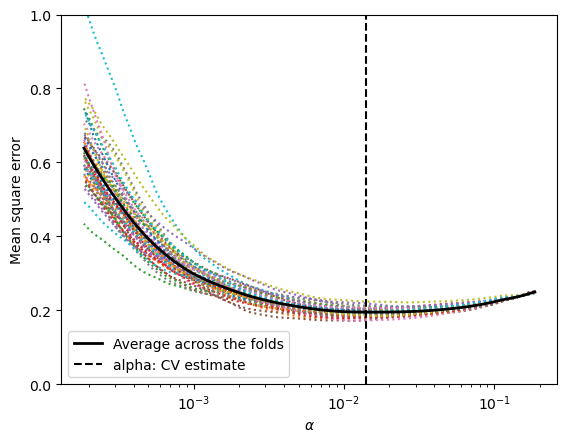

In [78]:
ymin, ymax =0, 1
lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()


In [79]:
lasso.alpha_

0.014081051937973002

In [80]:
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

In [81]:
lsvc =  Lasso(alpha=lasso.alpha_).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.611e+01, tolerance: 2.865e-02
  model = cd_fast.enet_coordinate_descent(


(1146, 187)

In [82]:
lasso_coef=pd.DataFrame(lsvc.coef_)
lasso_coef.index=X_NAomit_data.columns
lasso_coef.columns=["coef"]
lasso_coef


,coef
MW,-0.000589
AMW,-0.000000
Sv,0.000000
Se,0.000000
Sp,0.000000
...,...
s34_relSize,-0.000000
s34_phSize,-0.000000
s34_phRelSize,-0.000000
chiralMoment,-0.000000


In [83]:
lasso_coef_last=lasso_coef[(lasso_coef["coef"]>0)|(lasso_coef["coef"]<0)]
lasso_coef_last.to_csv("./Supplementary Data S6.csv",sep=',')
lasso_coef_last.head()

,coef
MW,-0.000589
max_conj_path,0.006244
D/Dtr05,0.000787
D/Dtr06,-0.000184
D/Dtr08,0.000936


In [84]:
Lasso_data=X_NAomit_data[X_NAomit_data.columns[model.get_support()]]
Lasso_data

,MW,max_conj_path,D/Dtr05,D/Dtr06,D/Dtr08,D/Dtr09,D/Dtr10,D/Dtr11,D/Dtr12,ZM1Kup,...,TPSA(Tot),SAtot,SAdon,Vx,VvdwZAZ,MDEC-24,s3_size,s4_numRotBonds,s2_numAroBonds,s34_size
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
3185712.0,536.72,9.0,262.170654,294.979398,0.000000,0.000000,0.000000,0.0,0.0,603.695237,...,172.12,686.401741,83.805126,664.883721,484.15,0.000000,5.5,5.5,3.0,31.5
3532333.0,359.86,8.0,0.000000,212.320330,0.000000,0.000000,111.199719,0.0,0.0,398.845717,...,98.98,417.373280,36.021501,414.252492,304.32,0.000000,0.0,0.0,0.0,0.0
16830460.0,472.41,12.0,0.000000,471.074204,0.000000,0.000000,0.000000,0.0,0.0,512.791152,...,70.59,565.665828,18.010751,555.830565,400.92,0.000000,0.0,0.0,0.0,0.0
3921421.0,468.59,6.0,0.000000,541.435495,0.000000,0.000000,0.000000,0.0,0.0,524.646510,...,81.54,637.982011,42.683343,603.936877,440.06,5.222984,9.0,6.0,0.0,31.0
1314610.0,353.78,11.0,122.318827,151.087941,0.000000,103.326195,0.000000,0.0,0.0,461.033086,...,80.31,390.840292,18.010751,395.066445,286.00,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664630.0,272.38,10.0,0.000000,104.747025,0.000000,0.000000,89.373066,0.0,0.0,287.449055,...,53.17,392.110140,18.010751,366.245847,273.48,0.000000,0.0,0.0,0.0,0.0
3228536.0,395.47,10.0,239.404822,102.198910,120.588448,0.000000,0.000000,0.0,0.0,501.425648,...,114.60,458.127806,18.010751,458.455150,321.79,0.000000,9.0,2.0,6.0,21.0
666815.0,397.48,8.0,60.907751,251.084340,0.000000,116.929529,0.000000,0.0,0.0,517.167699,...,91.36,491.721270,0.000000,478.737542,352.36,0.000000,0.0,0.0,0.0,0.0


In [85]:
Lasso_data.to_csv('./Lasso_data.csv',encoding='utf-8')

In [86]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Lasso_data)
X_scaled_data=Transformer.transform(Lasso_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Lasso_data.columns
X_scaled_data.index=Raw_data.index

joblib.dump(Transformer, './Lasso_Scaler_transformer.pkl')

X_scaled_data

,MW,max_conj_path,D/Dtr05,D/Dtr06,D/Dtr08,D/Dtr09,D/Dtr10,D/Dtr11,D/Dtr12,ZM1Kup,...,TPSA(Tot),SAtot,SAdon,Vx,VvdwZAZ,MDEC-24,s3_size,s4_numRotBonds,s2_numAroBonds,s34_size
OPTUM_LAB_ID,,,,,,,,,,,,,,,,,,,,,
3185712.0,0.296685,0.321429,0.239260,0.146632,0.000000,0.000000,0.000000,0.0,0.0,0.340758,...,0.408466,0.256010,0.163618,0.277083,0.273019,0.000000,0.354839,0.115789,0.375,0.336898
3532333.0,0.145247,0.285714,0.000000,0.105543,0.000000,0.000000,0.136878,0.0,0.0,0.156849,...,0.194061,0.105590,0.070327,0.123581,0.122793,0.000000,0.000000,0.000000,0.000,0.000000
16830460.0,0.241619,0.428571,0.000000,0.234167,0.000000,0.000000,0.000000,0.0,0.0,0.259147,...,0.110838,0.188504,0.035164,0.210292,0.203490,0.000000,0.000000,0.000000,0.000,0.000000
3921421.0,0.238348,0.214286,0.000000,0.269143,0.000000,0.000000,0.000000,0.0,0.0,0.269790,...,0.142937,0.228938,0.083333,0.239755,0.236187,0.648396,0.580645,0.126316,0.000,0.331551
1314610.0,0.140041,0.392857,0.111629,0.075104,0.000000,0.107116,0.000000,0.0,0.0,0.212680,...,0.139331,0.090755,0.035164,0.111830,0.107488,0.000000,0.000000,0.000000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664630.0,0.070342,0.357143,0.000000,0.052069,0.000000,0.000000,0.110011,0.0,0.0,0.056840,...,0.059772,0.091465,0.035164,0.094179,0.097029,0.000000,0.000000,0.000000,0.000,0.000000
3228536.0,0.175739,0.357143,0.218483,0.050802,0.306835,0.000000,0.000000,0.0,0.0,0.248943,...,0.239850,0.128377,0.035164,0.150653,0.137387,0.000000,0.580645,0.042105,0.750,0.224599
666815.0,0.177460,0.285714,0.055585,0.124812,0.000000,0.121219,0.000000,0.0,0.0,0.263076,...,0.171723,0.147160,0.000000,0.163075,0.162924,0.000000,0.000000,0.000000,0.000,0.000000


In [87]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [88]:
#Setting the KFold 
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

In [90]:
#Data pre-processing of models
X=np.array(X_scaled_data)
y=Raw_data['Activity'].values

## 1.1 DT

In [91]:
clf=DecisionTreeClassifier(random_state=0)

In [92]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.619814,0.004582
Accuracy_train,1.000000,0.000000
F1 Score,0.619856,0.004555
Precision,0.620652,0.004963
Recall,0.620423,0.005823
Roc_auc,0.619799,0.004582


In [93]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=12, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-14 21:22:25,566] A new study created in memory with name: no-name-c3614020-9849-4dff-8280-b771b3bebc73
[I 2024-11-14 21:22:29,226] Trial 0 finished with value: 0.6471258781089805 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.6471258781089805.
[I 2024-11-14 21:22:29,414] Trial 1 finished with value: 0.6279289918359598 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.6471258781089805.
[I 2024-11-14 21:22:29,598] Trial 2 finished with value: 0.634900322764382 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 0 with value: 0.6471258781089805.
[I 2024-11-14 21:22:29,783] Trial 3 finished with value: 0.6305350294285172 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 0 with value: 0.6471258781089805.
[I 2024-11-14 21:22:29,967] Trial 4 finished with value: 0.6341101196126827

In [94]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 5, 'max_features': 17, 'min_samples_split': 3}


In [95]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.648609,0.005099
Accuracy_train,0.756589,0.002231
F1 Score,0.652491,0.006291
Precision,0.645749,0.005552
Recall,0.663991,0.010066
Roc_auc,0.683640,0.005051


In [96]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['DT']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./DT_model_lasso_data.csv",sep=',')
Model_data

Method                DT                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.619814  0.004582  0.648609  0.005099
Accuracy_train  1.000000  0.000000  0.756589  0.002231
F1 Score        0.619856  0.004555  0.652491  0.006291
Precision       0.620652  0.004963  0.645749  0.005552
Recall          0.620423  0.005823  0.663991  0.010066
Roc_auc         0.619799  0.004582  0.683640  0.005051

## 1.2 LR

In [97]:
clf=LogisticRegression(solver='liblinear',random_state=0,dual=False)

In [98]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.722692,0.004433
Accuracy_train,0.761933,0.001057
F1 Score,0.726359,0.004481
Precision,0.717212,0.004715
Recall,0.736783,0.005738
Roc_auc,0.794243,0.003870


In [99]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-14 21:22:49,477] A new study created in memory with name: no-name-7843e209-7761-4d81-89ca-c2b951e692c3
[I 2024-11-14 21:22:52,695] Trial 0 finished with value: 0.7129158913992785 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.7129158913992785.
[I 2024-11-14 21:22:52,913] Trial 1 finished with value: 0.7008699449401936 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 0 with value: 0.7129158913992785.
[I 2024-11-14 21:22:53,145] Trial 2 finished with value: 0.6876050882855516 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 0 with value: 0.7129158913992785.
[I 2024-11-14 21:22:53,409] Trial 3 finished with value: 0.728454528194418 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 3 with value: 0.7284545281

In [100]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 85.4545028000233, 'l1_ratio': 0.528440706950595, 'max_iter': 1528}


In [101]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda

,Mean,Se
Accuracy_test,0.750000,0.003570
Accuracy_train,0.820921,0.001116
F1 Score,0.751578,0.003448
Precision,0.748110,0.004700
Recall,0.756522,0.004848
Roc_auc,0.813838,0.002911


In [102]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['LR']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./LR_model_lasso_data.csv",sep=',')
Model_data

Method                LR                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.722692  0.004433  0.750000  0.003570
Accuracy_train  0.761933  0.001057  0.820921  0.001116
F1 Score        0.726359  0.004481  0.751578  0.003448
Precision       0.717212  0.004715  0.748110  0.004700
Recall          0.736783  0.005738  0.756522  0.004848
Roc_auc         0.794243  0.003870  0.813838  0.002911

## 1.3 RF

In [103]:
clf=RandomForestClassifier(random_state=0)

In [104]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.705591,0.003320
Accuracy_train,1.000000,0.000000
F1 Score,0.706152,0.003557
Precision,0.705308,0.003888
Recall,0.708526,0.005622
Roc_auc,0.773311,0.003423


In [105]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=1
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-11-14 21:25:15,394] A new study created in memory with name: no-name-f210d30a-6e61-429d-9d84-9973a9ccd6e8
[I 2024-11-14 21:25:25,674] Trial 0 finished with value: 0.49825327510917033 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.49825327510917033.
[I 2024-11-14 21:25:33,596] Trial 1 finished with value: 0.49825327510917033 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.49825327510917033.
[I 2024-11-14 21:25:51,010] Trial 2 finished with value: 0.49825327510917033 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.49825327510917033.
[I 2024-11-14 21:25:59,801] Trial 3 finished with value: 0.49825327510917033 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features':

In [106]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 696, 'max_depth': 18, 'max_features': 24, 'min_impurity_decrease': 0.0005877694670980782}


In [107]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.714666,0.003311
Accuracy_train,0.999891,0.000046
F1 Score,0.716444,0.003666
Precision,0.712319,0.003811
Recall,0.722307,0.005999
Roc_auc,0.783051,0.003676


In [108]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['RF']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./RF_model_lasso_data.csv",sep=',')
Model_data

Method                RF                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.705591  0.003320  0.714666  0.003311
Accuracy_train  1.000000  0.000000  0.999891  0.000046
F1 Score        0.706152  0.003557  0.716444  0.003666
Precision       0.705308  0.003888  0.712319  0.003811
Recall          0.708526  0.005622  0.722307  0.005999
Roc_auc         0.773311  0.003423  0.783051  0.003676

## 1.4 XGBoost

In [109]:
clf=xgb.XGBClassifier(random_state=0)

In [110]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.714049,0.003174
Accuracy_train,1.000000,0.000000
F1 Score,0.716252,0.003368
Precision,0.711574,0.003907
Recall,0.723031,0.006039
Roc_auc,0.778745,0.003458


In [111]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-14 21:41:09,125] A new study created in memory with name: no-name-ac9d0e0b-963e-4e81-9d8e-39369665282c
C:\Users\A\AppData\Local\Temp\ipykernel_85072\2666013998.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\A\AppData\Local\Temp\ipykernel_85072\2666013998.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
E:\C++\anaconda\envs\hydrogel\lib\site-packages\optuna\distributions.py:668: UserWarning: The distribution is specified by [0.0001, 0.2] and step=0.005, but the range is not divisible by `step`. It will be 

In [112]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 6.052425424222589, 'alpha': 0.40529624769915296, 'colsample_bytree': 1.0, 'subsample': 0.6000000000000001, 'learning_rate': 0.035100000000000006, 'n_estimators': 405}


In [113]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.721818,0.003827
Accuracy_train,1.000000,0.000000
F1 Score,0.724838,0.004087
Precision,0.717326,0.004230
Recall,0.733998,0.006064
Roc_auc,0.793690,0.003490


In [114]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['XGB']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./XGB_model_lasso_data.csv",sep=',')
Model_data

Method               XGB                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.714049  0.003174  0.721818  0.003827
Accuracy_train  1.000000  0.000000  1.000000  0.000000
F1 Score        0.716252  0.003368  0.724838  0.004087
Precision       0.711574  0.003907  0.717326  0.004230
Recall          0.723031  0.006039  0.733998  0.006064
Roc_auc         0.778745  0.003458  0.793690  0.003490

# 2. MLREM

In [ ]:
col_data= pd.read_csv("./Results/MLREM_col.csv",header=0,index_col=0)

In [ ]:
MRLEM_data=X_NAomit_data[col_data.index]
MRLEM_data

In [ ]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(MRLEM_data)
X_scaled_data=Transformer.transform(MRLEM_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=MRLEM_data.columns
X_scaled_data.index=Raw_data.index
X_scaled_data.to_csv("./Original data/MRLEM_data_X_scaled_data.csv",sep=',',header=1,index=1)
joblib.dump(Transformer, './Models/MRLEM_data_Scaler_transformer.pkl')

X_scaled_data.head()

In [93]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc'])
    return Model

In [94]:
#Setting the KFold 
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)


In [95]:
#Data pre-processing of models
X=np.array(X_scaled_data)
y=Raw_data['Hydrogel-forming ability'].values
clf=LogisticRegression(solver='liblinear',random_state=0,dual=False)

## 2.1 DT

In [139]:
clf=DecisionTreeClassifier(random_state=0)

In [96]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.629333,0.015032
Accuracy_train,0.729981,0.004700
F1 Score,0.697627,0.013235
Precision,0.620752,0.011961
Recall,0.811071,0.020893
Roc_auc,0.664796,0.020543


In [97]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:29:56,212] A new study created in memory with name: no-name-6a0b1671-0ec2-4905-98f9-69d2f7e33654
[I 2024-01-12 01:29:57,476] Trial 0 finished with value: 0.6312380952380953 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.6312380952380953.
[I 2024-01-12 01:29:57,505] Trial 1 finished with value: 0.5926666666666667 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.6312380952380953.
[I 2024-01-12 01:29:57,530] Trial 2 finished with value: 0.6375238095238095 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 2 with value: 0.6375238095238095.
[I 2024-01-12 01:29:57,554] Trial 3 finished with value: 0.6208571428571428 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 2 with value: 0.6375238095238095.
[I 2024-01-12 01:29:57,579] Trial 4 finished with value: 0.629619047619047

In [100]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 5, 'max_features': 13, 'min_samples_split': 3}


In [102]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.680000,0.012329
Accuracy_train,0.925345,0.005584
F1 Score,0.706865,0.012092
Precision,0.698240,0.013460
Recall,0.735714,0.020076
Roc_auc,0.690561,0.015281


In [103]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['DT']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/DT_model_mlrem_data.csv",sep=',')
Model_data

Method                DT                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.629333  0.015032  0.680000  0.012329
Accuracy_train  0.729981  0.004700  0.925345  0.005584
F1 Score        0.697627  0.013235  0.706865  0.012092
Precision       0.620752  0.011961  0.698240  0.013460
Recall          0.811071  0.020893  0.735714  0.020076
Roc_auc         0.664796  0.020543  0.690561  0.015281

## 2.2 LR

In [104]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.680000,0.012329
Accuracy_train,0.925345,0.005584
F1 Score,0.706865,0.012092
Precision,0.698240,0.013460
Recall,0.735714,0.020076
Roc_auc,0.690561,0.015281


In [105]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:33:46,194] A new study created in memory with name: no-name-e4ba7b5b-b8fd-4929-82c3-50137ca4832b
[I 2024-01-12 01:33:46,218] Trial 0 finished with value: 0.6096190476190476 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.6096190476190476.
[I 2024-01-12 01:33:46,239] Trial 1 finished with value: 0.6195238095238095 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 1 with value: 0.6195238095238095.
[I 2024-01-12 01:33:46,262] Trial 2 finished with value: 0.570095238095238 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 1 with value: 0.6195238095238095.
[I 2024-01-12 01:33:46,284] Trial 3 finished with value: 0.6294285714285714 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 3 with value: 0.6294285714

In [106]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 1.5684558195868687, 'l1_ratio': 0.51063148634346, 'max_iter': 1863}


In [108]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda

,Mean,Se
Accuracy_test,0.632190,0.014648
Accuracy_train,0.735909,0.004541
F1 Score,0.694496,0.013341
Precision,0.627650,0.012121
Recall,0.794643,0.021058
Roc_auc,0.673325,0.020325


In [109]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['LR']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/LR_model_mlrem_data.csv",sep=',')
Model_data

Method                LR                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.680000  0.012329  0.632190  0.014648
Accuracy_train  0.925345  0.005584  0.735909  0.004541
F1 Score        0.706865  0.012092  0.694496  0.013341
Precision       0.698240  0.013460  0.627650  0.012121
Recall          0.735714  0.020076  0.794643  0.021058
Roc_auc         0.690561  0.015281  0.673325  0.020325

## 2.3 RF

In [110]:
clf=RandomForestClassifier(random_state=0)

In [111]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.676381,0.014691
Accuracy_train,0.978164,0.001539
F1 Score,0.711877,0.013423
Precision,0.688878,0.014746
Recall,0.757857,0.020561
Roc_auc,0.756424,0.017012


In [112]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=1
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-01-12 01:35:16,075] A new study created in memory with name: no-name-0e368382-34a5-42fd-91ba-b1b1a0a8e3bf
[I 2024-01-12 01:35:19,314] Trial 0 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:21,908] Trial 1 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:27,120] Trial 2 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:30,335] Trial 3 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [113]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 879, 'max_depth': 9, 'max_features': 28, 'min_impurity_decrease': 0.008123194334826785}


In [115]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.670571,0.013460
Accuracy_train,0.974643,0.001874
F1 Score,0.703054,0.013994
Precision,0.681364,0.014131
Recall,0.749643,0.022551
Roc_auc,0.752985,0.015938


In [116]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['RF']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/RF_model_mlrem_data.csv",sep=',')
Model_data

Method                RF                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.676381  0.014691  0.670571  0.013460
Accuracy_train  0.978164  0.001539  0.974643  0.001874
F1 Score        0.711877  0.013423  0.703054  0.013994
Precision       0.688878  0.014746  0.681364  0.014131
Recall          0.757857  0.020561  0.749643  0.022551
Roc_auc         0.756424  0.017012  0.752985  0.015938

## 2.4 XGBoost

In [117]:
clf=xgb.XGBClassifier(random_state=0)

In [118]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.662476,0.016918
Accuracy_train,0.978164,0.001539
F1 Score,0.693483,0.017356
Precision,0.671509,0.015551
Recall,0.737143,0.025112
Roc_auc,0.749660,0.017686


In [119]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:49:39,219] A new study created in memory with name: no-name-9bfd5a88-8b2a-4996-844c-9f159bf96100
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
E:\C++\anaconda\envs\hydrogel\lib\site-packages\optuna\distributions.py:668: UserWarning: The distribution is specified by [0.0001, 0.2] and step=0.005, but the range is not divisible by `step`. It will be 

In [120]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 0.0013221304985698086, 'alpha': 0.02305461805888264, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.15009999999999998, 'n_estimators': 884}


In [121]:
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.682000,0.015467
Accuracy_train,0.978164,0.001539
F1 Score,0.710276,0.015000
Precision,0.693874,0.013624
Recall,0.748214,0.023279
Roc_auc,0.752117,0.018448


In [123]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['XGB']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/XGB_model_mlrem_data.csv",sep=',')
Model_data

Method               XGB                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.662476  0.016918  0.682000  0.015467
Accuracy_train  0.978164  0.001539  0.978164  0.001539
F1 Score        0.693483  0.017356  0.710276  0.015000
Precision       0.671509  0.015551  0.693874  0.013624
Recall          0.737143  0.025112  0.748214  0.023279
Roc_auc         0.749660  0.017686  0.752117  0.018448